In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    RocCurveDisplay, ConfusionMatrixDisplay
)

In [5]:
df = pd.read_csv('../data/calonpembelimobil.csv')

df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [7]:
df = df.drop(columns=['ID'])

df.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,240,1
1,49,2,1,1,100,0
2,52,1,0,2,250,1
3,26,2,1,1,130,0
4,45,3,0,2,237,1


In [8]:
print(df.isnull().sum())

Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


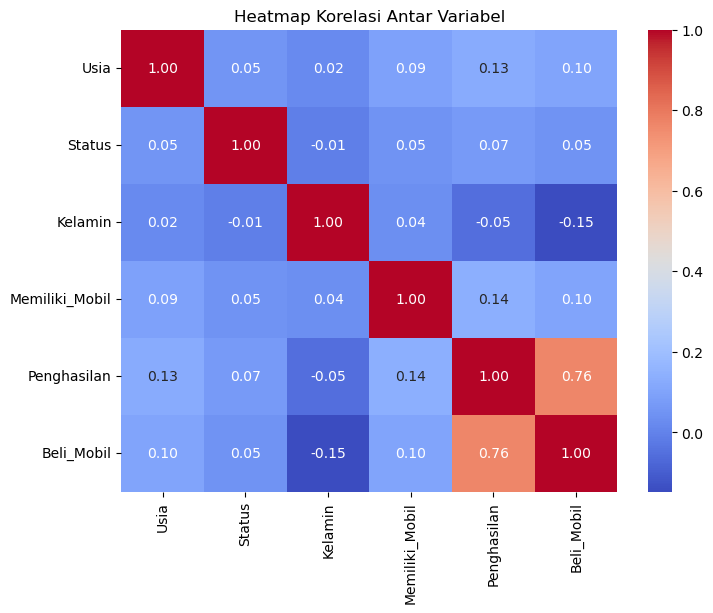

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [ ]:
X = df.drop(columns=['Beli_Mobil'])
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data latih", X_train.shape) 
print("Data uji", X_test.shape)

Data latih (800, 5)
Data uji (200, 5)


In [13]:
numeric_features = ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
     transformers=[
          ("num", numeric_transformer, numeric_features)
     ],
     remainder='passthrough'
)

pipeline = Pipeline(steps=[
     ("preprocessor", preprocessor),
     ("classifier", LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipeline.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


In [23]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Akurasi: {accuracy_score(y_test, y_pred):4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):4f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, zero_division=0):4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):4f}")

Akurasi: 0.930000
Precision: 0.982906
Recall: 0.905512
F1-Score: 0.942623
ROC-AUC: 0.976809


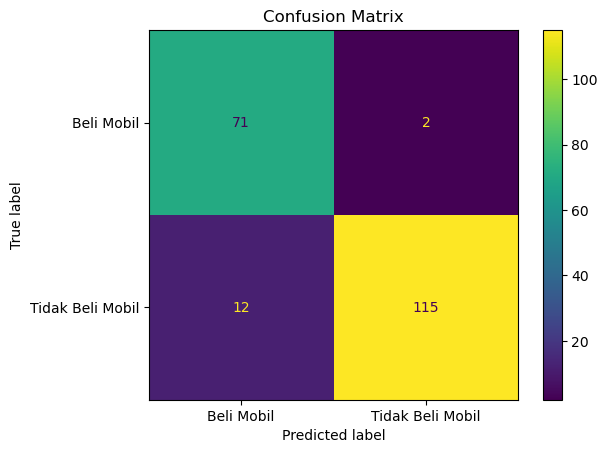

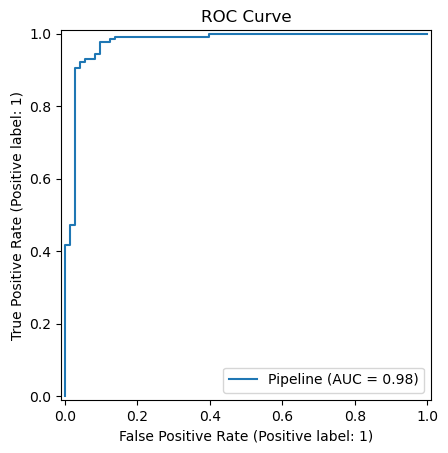

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                       display_labels=['Beli Mobil', 'Tidak Beli Mobil']).plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Tidak Beli Mobil(0)', 'Beli Mobil (1)']))

                     precision    recall  f1-score   support

Tidak Beli Mobil(0)       0.86      0.97      0.91        73
     Beli Mobil (1)       0.98      0.91      0.94       127

           accuracy                           0.93       200
          macro avg       0.92      0.94      0.93       200
       weighted avg       0.94      0.93      0.93       200



In [26]:
scores = cross_val_score(pipeline, X, y, cv=5)
print("\n=== CROSS VALIDATION ===")
print(f"Akurasi per Fold : {scores}")
print(f"Rata-rata Akurasi: {np.mean(scores):.4f}")
print(f"Standar Deviasi  : {np.std(scores):.4f}")


=== CROSS VALIDATION ===
Akurasi per Fold : [0.78  0.925 0.955 0.945 0.94 ]
Rata-rata Akurasi: 0.9090
Standar Deviasi  : 0.0652


In [20]:
data_baru = pd.DataFrame({
    "Usia": [28, 45, 38],
    "Status": [1, 3, 2],
    "Kelamin": [0, 1, 1],
    "Memiliki_Mobil": [0, 1, 0],
    "Penghasilan": [200, 300, 150]
})

prediksi = pipeline.predict(data_baru)
probabilitas = pipeline.predict_proba(data_baru)[:, 1]

hasil_prediksi = data_baru.copy()
hasil_prediksi["Prediksi_Beli"] = prediksi
hasil_prediksi["Probabilitas_Beli"] = probabilitas

print("\n=== HASIL PREDIKSI DATA BARU ===")
print(hasil_prediksi)


=== HASIL PREDIKSI DATA BARU ===
   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Prediksi_Beli  \
0    28       1        0               0          200              0   
1    45       3        1               1          300              1   
2    38       2        1               0          150              0   

   Probabilitas_Beli  
0           0.287297  
1           0.925209  
2           0.009249  
